* Look at big picture
* Get data
* Visualize data to gain insights
* Prepare data for ML
* Select model and train
* Fine-tune model
* Present solution
* Launch, monitor, and maintain

[Useful reference](https://www.kaggle.com/artgor/eda-feature-engineering-and-model-interpretation)

## Find box office hits

My task is to build a model of box office revenue for movies from The Movie Database. The results of this model would feed into a decision-making algorithm that a big movie theater chain uses to select which movies to run. The output of this supervised regression is critical to optimizing ticket revenue for your employer.

Current estimations are currently done mainly by intuition and checking buzz.

### Check assumptions

I'm going to build a model off of these movies titles to build a box office forecast for future movies. 

* Does this need to be a regression task?
* Should it be online? Or is it okay that it's offline?
* How expansive is this data? Is it enough to make statements about other movies, or should more data be collected?
* Are these titles are representative of the full gamut of movies?
* Are movie-going patterns the same today that they were 10 years ago? Will be the same that they are 10 years later?

I'm going to treat this as a continuous regression task. It's possible to run this as a classification task or interval regression task as well.

I'm going to run it offline and in batch since the data isn't so big; if I were to deploy this project I would set it up as an online learning problem. There probably isn't enough data to make broader generalizations. And if we were to deploy, weighting movies that are more recent is a good idea as media consumption has changed significantly in just the past five years.

## Get the data

This data comes from a [Kaggle competition](https://www.kaggle.com/c/tmdb-box-office-prediction/data) hosted by TMDB.

In [143]:
import pandas as pd

In [144]:
## renamed the training data to TMDB_movie_data.csv, and stored it in a local folder called Data
movies = pd.read_csv("../Data/TMDB_movie_data.csv")
movies.shape

(3000, 23)

There's only 3000 samples of training data, which seems a bit scarce.

In [145]:
movies.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [146]:
movies[['belongs_to_collection','genres','production_companies',
        'production_countries','spoken_languages',
        'Keywords','cast','crew']].head()

,belongs_to_collection,genres,production_companies,production_countries,spoken_languages,Keywords,cast,crew
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...","[{'id': 35, 'name': 'Comedy'}]","[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
1,"[{'id': 107674, 'name': 'The Princess Diaries ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de..."
2,NaN,"[{'id': 18, 'name': 'Drama'}]","[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de..."
3,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...","[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de..."
4,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]","[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de..."


These columns store data as lists of dictionaries. Time to extract info form these guys.

`popularity` is an attribute that probably wouldn't normally be available prior to release, but I want to predict the box office without knowing any future information about a movie.

In [147]:
movies.drop('popularity',axis=1,inplace=True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords                 2724 non-null object
cast                  

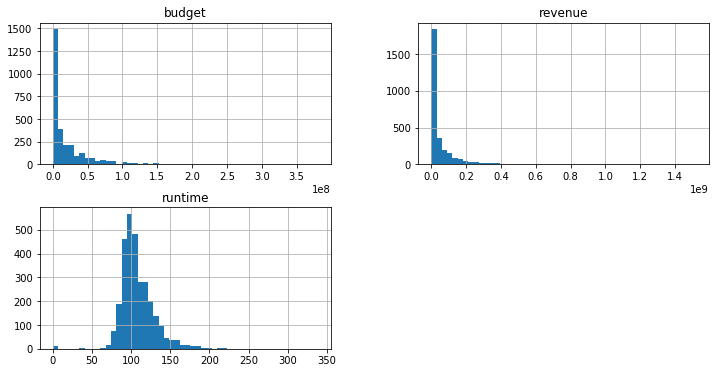

In [148]:
import matplotlib.pyplot as plt
movies[['budget','runtime','revenue']].hist(bins=50,figsize=(12,6));
plt.show();

It seems like budget generally outpaces revenue, since it's on a larger scale. Both budget and revenue are right-tailed.

Average movie length is around 100 minutes.

## Split the data

Budget is one of the most important predictors of box office gross. Because it's so important to predicting revenue, I want to make sure all my training and testing data are representative of all budgets. I can use [stratified sampling](https://en.wikipedia.org/wiki/Stratified_sampling) -- sampling with respect to groupings (strata) -- to achieve this. This isn't an example of data leakage because I'm creating strata based off of outside research, rather than what I'm observing in the full dataset.

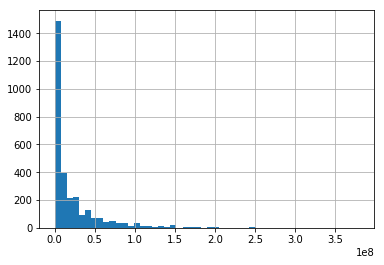

In [149]:
movies['budget'].hist(bins=50);

The buckets that I'm using are based off of the writer's guild budget agreements and a bit of tweaking on my part. I'll use low budget (< \\$30m), medium budget (between \\$30 and \\$80m), and high budget (> \\$80m)  as the strata in a temporary feature called `budget_cat`. 

In [150]:
movies['budget_cat'] = pd.cut(movies['budget'],[0,30000000,80000000,5000000000],labels=['low','medium','high'])

# make NaN cateogry, fill it in
movies['budget_cat'] = movies['budget_cat'].cat.add_categories('unknown')
movies['budget_cat'].fillna('unknown',inplace=True)

In [151]:
movies['budget_cat'].value_counts()

low        1505
unknown     812
medium      487
high        196
Name: budget_cat, dtype: int64

In [152]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=.2,random_state=14)

for train_index, test_index in split.split(movies, movies['budget_cat']):
    strat_train = movies.loc[train_index]
    strat_test = movies.loc[test_index]

The proportions of the original and training dataset should be the same.

In [153]:
movies['budget_cat'].value_counts()/len(movies)

low        0.501667
unknown    0.270667
medium     0.162333
high       0.065333
Name: budget_cat, dtype: float64

In [154]:
strat_train['budget_cat'].value_counts()/len(strat_train)

low        0.501667
unknown    0.270417
medium     0.162500
high       0.065417
Name: budget_cat, dtype: float64

Next, I remove the `budget_cat` attribute.

In [155]:
for set in [strat_train,strat_test]:
    set.drop(['budget_cat'],axis=1,inplace=True)

## Explore the data

Only visualize on the training data; save test set for testing the data

In [156]:
strat_train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
2545,2546,NaN,45000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://www.patriotsdayfilm.com/,tt4572514,en,Patriots Day,An account of Boston Police Commissioner Ed Da...,/mIDxsJTrOC7NhgOo3GziiHyKfsQ.jpg,...,12/12/16,133.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,The inside story of the world's greatest manhunt.,Patriots Day,"[{'id': 1680, 'name': 'boston'}, {'id': 1700, ...","[{'cast_id': 4, 'character': 'Sgt. Tommy Saund...","[{'credit_id': '587cad3bc3a3684a9e01776f', 'de...",50548152
2415,2416,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0106387,en,Benny & Joon,A mentally ill young woman finds her love in a...,/2a7amuuML6xvBn6XWV1sPG1Cmd5.jpg,...,4/16/93,98.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A romance on the brink of reality.,Benny & Joon,"[{'id': 1155, 'name': 'brother sister relation...","[{'cast_id': 2, 'character': 'Sam', 'credit_id...","[{'credit_id': '52fe43adc3a36847f8066f63', 'de...",23202734
1919,1920,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,tt0458367,en,Right at Your Door,"A dirty bomb goes off in Los Angeles, jamming ...",/6h24yrqU5TfAMI6dZBdiDUU3M0p.jpg,...,1/23/06,96.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Right at Your Door,"[{'id': 4458, 'name': 'post-apocalyptic'}]","[{'cast_id': 3, 'character': 'Lexi', 'credit_i...","[{'credit_id': '52fe46709251416c75078597', 'de...",2043704
1462,1463,NaN,8000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://focusfeatures.com/its_kind_of_a_funny_s...,tt0804497,en,It's Kind of a Funny Story,A clinically depressed teenager gets a new sta...,/wADblWdHMk2SIaZRBazTGOTBf4w.jpg,...,7/6/10,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sometimes what's in your head isn't as crazy a...,It's Kind of a Funny Story,"[{'id': 236, 'name': 'suicide'}, {'id': 894, '...","[{'cast_id': 11, 'character': 'Craig Gilner', ...","[{'credit_id': '567f355792514132db008f84', 'de...",6491240
220,221,NaN,12000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.cityoflifeanddeath.co.uk/,tt1124052,zh,南京!南京!,"City of Life and Death takes place in 1937, du...",/zCzNvesRkmkmlK0g2Abp4y4zhb0.jpg,...,4/22/09,132.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,City of Life and Death,"[{'id': 1327, 'name': 'war crimes'}, {'id': 15...","[{'cast_id': 1, 'character': 'Lu Jianxiong', '...","[{'credit_id': '53afe79a0e0a265975005fda', 'de...",10652498


At a glance, it looks like genres, spoken languages, keywords, cast, and crew are stored as json objects, so I'll have to build some functions to parse through those. imdb_id is an identifier so it probably won't be that useful. I think the original language variable could be an interesting predictor for revenue. 

What languages are these movies in? 

In [157]:
strat_train['original_language'].value_counts()

en    2067
fr      58
hi      37
es      36
ru      36
ja      30
it      18
cn      16
ko      15
de      14
zh      13
ta      12
sv       8
fa       5
nl       4
ro       4
da       3
pt       3
fi       2
te       2
hu       2
ml       2
tr       2
pl       2
ur       1
no       1
ar       1
vi       1
mr       1
cs       1
he       1
id       1
nb       1
Name: original_language, dtype: int64

As expected, most of these movies are in English, followed by French, Hindi, and other languages. There's clearly way too many levels here, so I'll want to bin many of these language categories as "other".

For example, there are 30 movies in Japanese out of 2400 movies overall, which is only 1% of the data. Since I don't have much domain knowledge, I'll test out two types of binning.

In [158]:
strat_train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [159]:
strat_train['belongs_to_collection'][strat_train['belongs_to_collection'].notnull()].head()

300     [{'id': 91799, 'name': 'Tremors Collection', '...
1132    [{'id': 437628, 'name': 'Constantine Collectio...
166     [{'id': 173344, 'name': 'Qatsi Collection', 'p...
921     [{'id': 91361, 'name': 'Halloween Collection',...
2737    [{'id': 645, 'name': 'James Bond Collection', ...
Name: belongs_to_collection, dtype: object

What are the correlations between the numeric variables?

In [160]:
corr_matrix = strat_train.drop('id',axis=1).corr()
corr_matrix['revenue'].sort_values(ascending=False)

revenue    1.000000
budget     0.743399
runtime    0.195318
Name: revenue, dtype: float64

Budget and runtime are both very strongly correlated with revenue. 

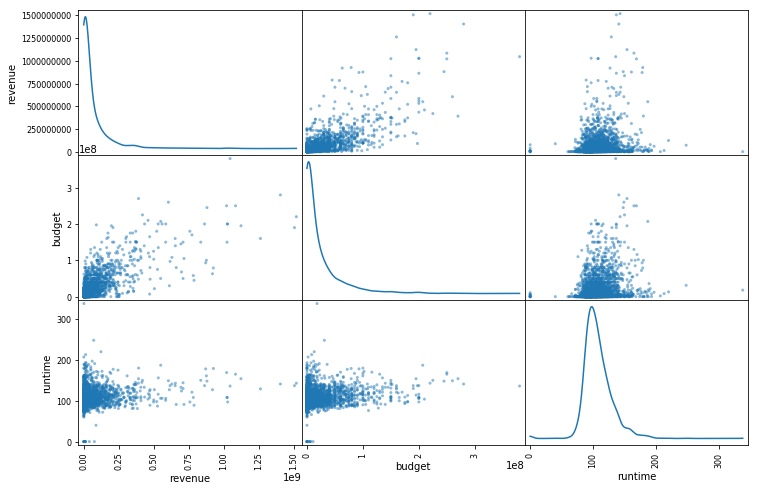

In [161]:
from pandas.plotting import scatter_matrix

attributes = ["revenue","budget","runtime"]
scatter_matrix(strat_train[attributes],diagonal='kde',figsize=(12,8));

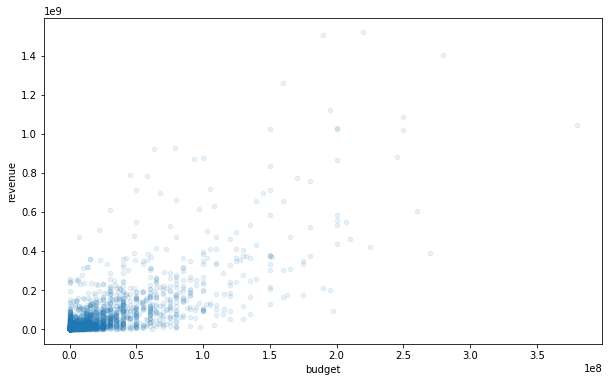

In [162]:
strat_train.plot(kind='scatter',x='budget',y='revenue',alpha=.1,figsize=(10,6));

A lot of the points are scattered towards the low end in terms of budget and revenue. There's a few movies that had really high budgets, but didn't end up generating too much revenue.

## Data preparation and transformations

In [163]:
## training data
movies = strat_train.drop('revenue',axis=1)
## testing data
movies_revenue = strat_train['revenue'].copy()

It looks like we're missing a lot of information in `belongs_to_collection` and `homepage`, I'll have to explore those two variables individually and decide whether or not to keep them.

In [74]:
movies.isnull().sum().sort_values(ascending=False)/len(movies)

belongs_to_collection    0.807917
homepage                 0.682083
tagline                  0.199167
Keywords                 0.095000
production_companies     0.053750
production_countries     0.019167
spoken_languages         0.007500
crew                     0.004167
cast                     0.003750
overview                 0.003333
genres                   0.001667
runtime                  0.000833
poster_path              0.000417
release_date             0.000000
original_title           0.000000
original_language        0.000000
imdb_id                  0.000000
status                   0.000000
budget                   0.000000
title                    0.000000
id                       0.000000
dtype: float64

### Numeric pipeline

There are two independent numeric variables, `budget` and `runtime`. In the trianing set, `runtime` is the only field missing runtime information. I'm going to impute both of these in a pipeline in case there are missing observations in the test dataset.

In [34]:
import numpy as np

## can use this to find all numeric features
movies_num = movies.drop('id',axis=1).select_dtypes(include='number')
movies_num.head()

,budget,runtime
2545,45000000,133.0
2415,0,98.0
1919,0,96.0
1462,8000000,101.0
220,12000000,132.0


In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.impute import SimpleImputer


num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    PowerTransformer(method='yeo-johnson',standardize=False),
    StandardScaler()
)

Because I'm planning on running a linear regression, I need to make sure that my features are on the same scale so that a) gradient descent converges quickly and b) I get better interpretability of my regression coefficients. This logic doesn't apply with random forests though, since they're based on decision thresholds.

In [48]:
movies_num = pd.DataFrame(num_pipeline.fit_transform(movies_num),columns=movies_num.columns).isnull().sum()

### Categorical pipeline

More tricky. A lot of features wrapped up in dictionaries.

#### Extract genres

The `genres` field consists of a list of dictionaries, where each dictionary represents a single genre. This list is represented as a string. In order to extract the appropriate information, I'll have to convert the string to a list, then extract the genre from each element. I'll define a helper function, `get_names()` to extract the genre from each dictionary.

In [77]:
movies['genres'].head()

2545    [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...
2415    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
1919    [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...
1462    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
220     [{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...
Name: genres, dtype: object

In [95]:
movies['genres'].apply(lambda x: print(eval(x)))

[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}]
[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]
[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}]
[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}]
[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name': 'History'}, {'id': 10752, 'name': 'War'}]
[{'id': 16, 'name': 'Animation'}, {'id': 10751, 'name': 'Family'}, {'id': 12, 'name': 'Adventure'}]
[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]
[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 35, 'name': 'Comedy'}]
[{'id': 27, 'name': 'Horror'}, {'id': 53, 'name': 'Thriller'}]
[{'id': 35, 'name': 'Comedy'}]
[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 53, 'name': 'Thriller'}]
[{'id': 27, 'name': 'Horror'}, {'id': 878, 'name': 'Science Fiction'}, {'id': 53, 'name': 'Thriller'}]
[{'id': 18, 'name': '

TypeError: eval() arg 1 must be a string, bytes or code object

In [90]:
movies['genres'].apply(lambda x: print(x[1]))

{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{
{


TypeError: 'float' object is not subscriptable

In [104]:
movies.loc[movies['genres'].isnull(),'genres'] = "[{'name':'Unknown'}]"
movies['genres'].apply(lambda genre_list: [d['name'] for d in literal_eval(genre_list)])

2545                             [Crime, Drama, Thriller]
2415                             [Comedy, Drama, Romance]
1919                                    [Drama, Thriller]
1462                                      [Comedy, Drama]
220                                 [Drama, History, War]
378                        [Animation, Family, Adventure]
750                              [Comedy, Drama, Romance]
2956                          [Action, Adventure, Comedy]
663                                    [Horror, Thriller]
2884                                             [Comedy]
497                         [Action, Adventure, Thriller]
1298                  [Horror, Science Fiction, Thriller]
911                                    [Drama, Adventure]
2823                                              [Drama]
613                                     [Comedy, Romance]
2432                                      [Comedy, Drama]
1463                                    [Drama, Thriller]
300           

In [86]:
movies['genres'].apply(lambda genre_list: [d['name'] for d in genre_list])

TypeError: string indices must be integers

In [76]:
[x['name'] for x in movies['genres']]

TypeError: string indices must be integers

In [106]:
from ast import literal_eval

## input: a list of dictionaries, where genre is specified by 'name'
## output: corresponding list of genres
def get_names(name_list):
    names = []
    
    for n in name_list:
        names.append(n['name'].lower())
        
    return(names)

## literal_eval evaluates a string as code
## here, I convert a string representation of a list of dicts to an actual list of dicts
movies.loc[movies['genres'].isnull(),'genres'] = "[{'name':'Unknown'}]"
movies['genres'] = movies['genres'].apply(literal_eval).apply(get_names)

NameError: name 'movies' is not defined

In [51]:
movies['genres']

2545                             [crime, drama, thriller]
2415                             [comedy, drama, romance]
1919                                    [drama, thriller]
1462                                      [comedy, drama]
220                                 [drama, history, war]
378                        [animation, family, adventure]
750                              [comedy, drama, romance]
2956                          [action, adventure, comedy]
663                                    [horror, thriller]
2884                                             [comedy]
497                         [action, adventure, thriller]
1298                  [horror, science fiction, thriller]
911                                    [drama, adventure]
2823                                              [drama]
613                                     [comedy, romance]
2432                                      [comedy, drama]
1463                                    [drama, thriller]
300           

In [6]:
from itertools import chain
from collections import Counter, OrderedDict

movie_genres = list(chain(*movies['genres']))
Counter(movie_genres)

Counter({'comedy': 1028,
         'drama': 1531,
         'family': 260,
         'romance': 571,
         'thriller': 789,
         'action': 741,
         'animation': 141,
         'adventure': 439,
         'horror': 301,
         'documentary': 87,
         'music': 100,
         'crime': 469,
         'science fiction': 290,
         'mystery': 225,
         'foreign': 31,
         'fantasy': 232,
         'war': 100,
         'western': 43,
         'history': 132,
         'unknown': 7,
         'tv movie': 1})

In [7]:
Counter(movie_genres).most_common(15)

[('drama', 1531),
 ('comedy', 1028),
 ('thriller', 789),
 ('action', 741),
 ('romance', 571),
 ('crime', 469),
 ('adventure', 439),
 ('horror', 301),
 ('science fiction', 290),
 ('family', 260),
 ('fantasy', 232),
 ('mystery', 225),
 ('animation', 141),
 ('history', 132),
 ('music', 100)]

In [8]:
top_genres = [t[0] for t in Counter(movie_genres).most_common(15)]



In [137]:
from itertools import chain
from collections import Counter, OrderedDict


def get_vals(dict_list):
    vals = []

    for d in dict_list:
        vals.append(d['name'].lower())

    return vals  

def get_genres(genres_column):
    genres_column = genres_column.fillna("[{'name':'Unknown'}]")
    genres_column = genres_column.apply(literal_eval).apply(get_vals)
    return genres_column

## input: series of lists of genres, and how many genres to keep
## output: list of top movie genres
def get_top_genres(genres_column,top_n=10):
    ## unpacks a list of lists
    genres = list(chain(*genres_column))
    top_genres = [t[0] for t in Counter(genres).most_common(top_n)]        
    return top_genres

In [128]:
strat_train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
2545,2546,NaN,45000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://www.patriotsdayfilm.com/,tt4572514,en,Patriots Day,An account of Boston Police Commissioner Ed Da...,/mIDxsJTrOC7NhgOo3GziiHyKfsQ.jpg,...,12/12/16,133.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,The inside story of the world's greatest manhunt.,Patriots Day,"[{'id': 1680, 'name': 'boston'}, {'id': 1700, ...","[{'cast_id': 4, 'character': 'Sgt. Tommy Saund...","[{'credit_id': '587cad3bc3a3684a9e01776f', 'de...",50548152
2415,2416,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0106387,en,Benny & Joon,A mentally ill young woman finds her love in a...,/2a7amuuML6xvBn6XWV1sPG1Cmd5.jpg,...,4/16/93,98.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A romance on the brink of reality.,Benny & Joon,"[{'id': 1155, 'name': 'brother sister relation...","[{'cast_id': 2, 'character': 'Sam', 'credit_id...","[{'credit_id': '52fe43adc3a36847f8066f63', 'de...",23202734
1919,1920,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,tt0458367,en,Right at Your Door,"A dirty bomb goes off in Los Angeles, jamming ...",/6h24yrqU5TfAMI6dZBdiDUU3M0p.jpg,...,1/23/06,96.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Right at Your Door,"[{'id': 4458, 'name': 'post-apocalyptic'}]","[{'cast_id': 3, 'character': 'Lexi', 'credit_i...","[{'credit_id': '52fe46709251416c75078597', 'de...",2043704
1462,1463,NaN,8000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://focusfeatures.com/its_kind_of_a_funny_s...,tt0804497,en,It's Kind of a Funny Story,A clinically depressed teenager gets a new sta...,/wADblWdHMk2SIaZRBazTGOTBf4w.jpg,...,7/6/10,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sometimes what's in your head isn't as crazy a...,It's Kind of a Funny Story,"[{'id': 236, 'name': 'suicide'}, {'id': 894, '...","[{'cast_id': 11, 'character': 'Craig Gilner', ...","[{'credit_id': '567f355792514132db008f84', 'de...",6491240
220,221,NaN,12000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.cityoflifeanddeath.co.uk/,tt1124052,zh,南京!南京!,"City of Life and Death takes place in 1937, du...",/zCzNvesRkmkmlK0g2Abp4y4zhb0.jpg,...,4/22/09,132.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,City of Life and Death,"[{'id': 1327, 'name': 'war crimes'}, {'id': 15...","[{'cast_id': 1, 'character': 'Lu Jianxiong', '...","[{'credit_id': '53afe79a0e0a265975005fda', 'de...",10652498


In [138]:
get_top_genres(get_genres(strat_train['genres']),15)

['drama',
 'comedy',
 'thriller',
 'action',
 'romance',
 'crime',
 'adventure',
 'horror',
 'science fiction',
 'family',
 'fantasy',
 'mystery',
 'animation',
 'history',
 'war']

#### Build the categorical transformer

In [180]:
## TransformerMixin gives fit_transform()
## BaseEstimator gives get_params() and set_params(), useful for hyperparameter tuning
from sklearn.base import BaseEstimator, TransformerMixin
from ast import literal_eval
from itertools import chain
from collections import Counter, OrderedDict

class cat_transformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.genres = []
        self.top_genres = []
        
    ## input: list of dictionaries, with 'name' key
    ## output: list of extracted values
    def get_vals(self,dict_list):
            vals = []
    
            for d in dict_list:
                vals.append(d['name'].lower())
                
            return vals    
        
    def get_genres(self,genres_column):
        genres_column = genres_column.fillna("[{'name':'Unknown'}]")
        genres_column = genres_column.apply(literal_eval).apply(get_vals)
        
    ## input: series of lists of genres, and how many genres to keep
    ## output: list of top movie genres
    def get_top_genres(self,genres_column,top_n=10):
        ## unpacks a list of lists
        genres = list(chain(*genres_column))
        top_genres = [t[0] for t in Counter(genres).most_common(top_n)]        
        return top_genres
    
    def fit(self,X,y=None):
        self.genres = get_genres(X['genres'])
        self.top_genres = get_top_genres(X['genres'],15)   
    
    def transform(self,X,y=None):                                                   
        ## make columns for top genres
        for g in self.top_genres:
            X['genre_'+g] = X['genres'].apply(lambda genre_list: 1 if g in genre_list else 0) ## cond'l expression
        
        return X

In [183]:
movies['genres']

2545    [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...
2415    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
1919    [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...
1462    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
220     [{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...
378     [{'id': 16, 'name': 'Animation'}, {'id': 10751...
750     [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2956    [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
663     [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...
2884                       [{'id': 35, 'name': 'Comedy'}]
497     [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
1298    [{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...
911     [{'id': 18, 'name': 'Drama'}, {'id': 12, 'name...
2823                        [{'id': 18, 'name': 'Drama'}]
613     [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
2432    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
1463    [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...
300     [{'id'

In [185]:
type(movies['genres'])

pandas.core.series.Series

In [181]:
p = cat_pipeline()

In [182]:
p.fit_transform(X=movies['genres'])

KeyError: 'genres'

In [117]:
movies = strat_train.drop('revenue',axis=1)

In [118]:
movies['genres'].isna().sum()

4

In [116]:
movies['genres'].fillna("[{'name':'Unknown'}]")[movies['genres'].isna()]

1814    [{'name':'Unknown'}]
2686    [{'name':'Unknown'}]
2423    [{'name':'Unknown'}]
2900    [{'name':'Unknown'}]
Name: genres, dtype: object

In [178]:
p is None

False